# Intro to cheminformatics with RDkit

<strong>Author(s):</strong> Seth D. Veenbaas, Jessica A. Nash, The Molecular Sciences Software Institute

<div class="alert alert-block alert-info">
<h2>Objectives:</h2>

* Introduce SMILES strings.

* Learn how to import packages/libraries.

* Use RDKit library to draw and characterize molecules.

* Learn how to get help with tab complete and the `help()` function.

</div>

There are Python libraries that are made for working just with chemical data. One commonly used library for cheminformatics is called [RDKit](https://en.wikipedia.org/wiki/RDKit).

RDKit provides a molecule object that allows you to manipulate chemical structures. It has capabilities for reading and writing molecular file formats, calculating molecular properties, and performing substructure searches. In addition, it offers a wide range of cheminformatics algorithms such as molecular fingerprint generation, similarity metrics calculation, and molecular descriptor computation. This notebook will only introduce a few RDKit basics and a common molecular format called SMILES. 

## Simplified Molecular-Input Line-entry System: SMILES 

SMILES stands for "Simplified Molecular-Input Line-Entry System" and is a way to represent molecules as a string of characters. SMILES is basically the cheminformatics version of the condensed formula we learned in gen chem.

You can read more about the SMILES syntax at [this tutorial](https://chemicbook.com/2021/02/13/smiles-strings-explained-for-beginners-part-1.html)

### SMILES examples

| Name              | SMILES      | Rule concepts                                 | Structure                                          |
| ----------------- | ----------- | --------------------------------------------- | -------------------------------------------------- |
| Ethanol           | CCO         | Atoms: `C` carbon, `O` oxygen<br>             | ![ethanol](images/ethanol.png)                     |
| Propargyl bromide | C#CCBr      | Atoms: `Br` bromine<br>Bonds: `#` triple      | ![Propargyl_bromide](images/propargyl_bromide.png) |
| 2-Propanone       | CC(=O)C     | Bonds: `=` double<br>Branches: `()`           | ![isopropanone](images/isopropanone.png)           |
| Phenol            | c1(O)ccccc1 | Aromatics: `c` lower case<br>Rings: `1.....1` | ![phenol](images/phenol.png)                       |


### Look up SMILES:

Most of the time, you will not need to write a SMILES string by hand.
You will be able to look up a molecule's SMILES string from a web database like:
* [PubChem](https://pubchem.ncbi.nlm.nih.gov/compound/Eugenol#section=SMILES) - names and identifiers section

    ![pubchem_eugenol](images/pubchem_eugenol.png)
    
* [Wikipedia](https://en.wikipedia.org/wiki/eugenol) - chemical identifiers panel

    ![wiki_eugenol](images/wikipedia_eugenol.png)

### SMILES and Chemdraw

#### Copy SMILES

You can copy a Chemdraw molecule as a SMILES string by:
1. Selecting the molecule
2. Open the Edit tab
3. Copy As > SMILES

#### Paste SMILES

You can [paste a SMILES structure into ChemDraw](https://people.stfx.ca/blynch/CS%20ChemOffice%202004/CS%20ChemDraw/CS%20ChemDraw%20Help/CD8ch11a5.html) to visualize a structure by:

1. Right-clicking
2. Special Paste > SMILES

![chemdraw_eugenol](images/chemdraw_eugenol.png)

<div class="alert alert-block alert-warning">
<h3>Exercise</h3>

<p> Use online resources to look up the SMILES string for the following structures:
<p>
    <ul>
        <li> What is the SMILES for ethyl acetate?</li>
        <li> What is the SMILES for vanillin?</li>
        <li> What is the SMILES for amoxicillin?</li>
    </ul>
</p>

You can look up the SMILES strings on <a href="https://pubchem.ncbi.nlm.nih.gov/">PubChem</a> or <a href="https://en.wikipedia.org/wiki/Main_Page">Wikipedia</a>
</div>

In [1]:
# Fill in your answers here as strings (remember to use quotation marks):
ethyl_acetate_smiles = 'O=C(OCC)C'
vanillin_smiles = 'c1(C=O)cc(OC)c(O)cc1'
amoxicillin_smiles = 'O=C(O)[C@@H]2N3C(=O)[C@@H](NC(=O)[C@@H](c1ccc(O)cc1)N)[C@H]3SC2(C)C'

## Importing Packages
In Python, we use **packages** (or libraries) to add extra functionality to our programs without having to reinvent the wheel ourselves. For example, RDKit is a library of tools specifically designed for cheminformatics.

To import a package, we use the `import` statement. Below, we'll import `rdkit` and `py3Dmol`. We will also directly import some `rdkit` modules (`AllChem`, `rdMolDescriptors`, `Descriptors3D`) that we will be using later in the notebook.


In [2]:
import rdkit
import py3Dmol
from rdkit.Chem import AllChem, Descriptors3D, Draw, rdMolDescriptors
from rdkit.Chem.Draw import SimilarityMaps

## Creating Molecules with RDKit

Throughout this tutorial, it will be helpful to have access to the [RDKit documentation](https://www.rdkit.org/docs/index.html). 

To get information about molecules in RDKit, we have to first create objects representing molecules. We will use SMILES strings to load our structures into RDkit, although RDKit accepts many other file formats.

### Creating molecules using SMILES

We can create a representation of ibuprofen using RDKit by using the `MolFromSmiles` function in `rdkit.Chem`.

In [3]:
ibuprofen_smiles = 'CC(Cc1ccc(cc1)C(C(=O)O)C)C'
ibuprofen = rdkit.Chem.MolFromSmiles(ibuprofen_smiles)

Let's explore the output of the `Chem.MolFromSmiles()` function using the `print()` and `type()` functions.

In [4]:
print(ibuprofen)
type(ibuprofen)

rdkit.Chem.rdchem.Mol

The `print()` function doesn't known how to represent this object. Instead it informed us that the variable `ibuprofen` is an RDkit `mol` object..

<div class="alert alert-block alert-success"> 
<strong>Python Skills: Python Objects</strong>

Most of this functionality is achieved through the RDKit `mol` object. In Python, we use the word "object" to refer to a variable type with associated data and methods. 
One example of an object we have seen in notebooks is a list - we could also call it a "list object". An object has `attributes` (data) and `methods`. 
You access information about objects with the syntax
```python
object.data
```
where data is the attribute name.

You acceess object methods with the syntax
```python
object.method(arguments)
```

For example, for a list "`append` is a method that was covered in the introductory lesson.

```
my_list = []
my_list.append(1) # "append" is a method
```
</div>   

## Draw molecules

To interact with our `ibuprofen` molecule object we need to use Rdkit methods associates with an `RDkit.mol` object.

We can draw the molecule using the `Chem.Draw.MolToImage()` method.

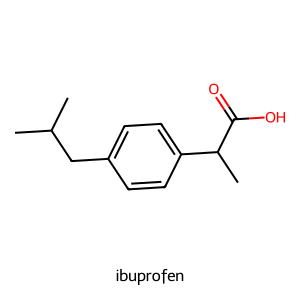

In [5]:
rdkit.Chem.Draw.MolToImage(ibuprofen, legend='ibuprofen')

Luckily, Jupyter is smart! Jupyter will automatically draw an RDkit `mol` object if it is in the last line of a code cell like this:

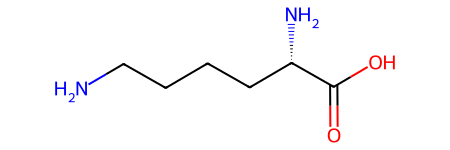

In [6]:
lysine = rdkit.Chem.MolFromSmiles("C(CCN)C[C@@H](C(=O)O)N")
lysine

<div class="alert alert-block alert-warning"> 
<h3>Challenge</h3>

- Use your smiles strings (named: `ethyl_acetate_smiles`, `vanillin_smiles` `amoxicillin_smiles`) to create RDkit molecule objects (named: `ethyl_acetate`, `vanillin`, `amoxicillin`). <br>
- Then, draw each structure in its own code cell. (**Bonus**: try to add a legend using the `legend` argument or change the size of the image using the `size` argument.)

</div>

In [7]:
# Create RDKit molecule objects from SMILES strings
ethyl_acetate = rdkit.Chem.MolFromSmiles(ethyl_acetate_smiles)
vanillin = rdkit.Chem.MolFromSmiles(vanillin_smiles)
amoxicillin = rdkit.Chem.MolFromSmiles(amoxicillin_smiles)

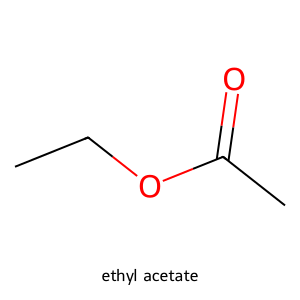

In [8]:
# Draw ethyl_acetate
rdkit.Chem.Draw.MolToImage(ethyl_acetate, legend='ethyl acetate')

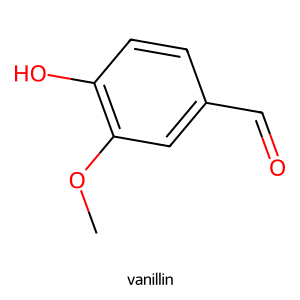

In [9]:
# Draw vanillin
rdkit.Chem.Draw.MolToImage(vanillin, legend="vanillin")

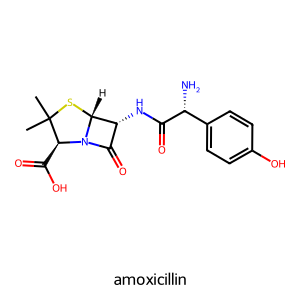

In [10]:
# Draw amoxicillin
rdkit.Chem.Draw.MolToImage(amoxicillin, legend="amoxicillin")

## Working with 3D Molecules

Visualizing molecules in 3D requires:
* Adding hygrogens for proper geometry
* Creating a geomertrically accuate conformation
* Using energy force fields to minimize the energy of the molecular conformation

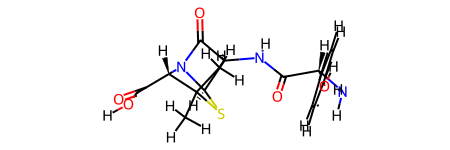

In [11]:
# Add Hydrogen atoms to molecule
amoxicillin = AllChem.AddHs(amoxicillin)

# Create a 3D molecule
AllChem.EmbedMolecule(amoxicillin)

# Minimize energy of molecular conformation
AllChem.MMFFOptimizeMolecule(amoxicillin)

amoxicillin

## Interactive molecules

A package called py3Dmol can even let us interact with our 3D molecule.

Controls for the interactive py3Dmol window:

|  Action   |         Control         |
| :-------: | :---------------------: |
|  rotate   |  `left click` + `drag`  |
| translate | `center click` + `drag` |
|   zoom    | `right click` + `drag`  |

In [12]:
# Open RDKit molecule in an interactive py3Dmol window
py3Dmol.view(
    data=rdkit.Chem.MolToMolBlock(amoxicillin),
    style={"stick": {}, "sphere": {"scale": 0.3}}
)

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

## Working with RDKit Molecules

RDKit molecule objects have a number of methods we can use to get more information about the molecule.
In the next few cells, we'll look at some methods that can tell us some things about the molecules we've created.

<div class="alert alert-block alert-success"> 
<strong>Jupyter Skills: The Tab Key</strong>

When working with Python objects in the Jupyter notebook, you can type a variable or object name to see the methods available on that object.

In the cell below, type `ethyl_acetate.` (include a (`.`) at the end), then press the `tab` key. 
A list of possible methods and attributes will come up.

Look through the methods and select the one that gives you the number of atoms in the molecule.

</div>

**NOTE:** Methods are functions so they require parentheses at the end.

```python
object.method()
```

In [13]:
# Pick a method that will determine the number of atom in ibuprofen.

ethyl_acetate.GetNumAtoms()

6

<div class="alert alert-block alert-success"> 
<strong>Python Skills: Getting Help</strong>

Is this the number of atoms you expected for ethyl acetate (including hydrogens)? 

We can use the `help()` function on the method you found in the previous step to find a method argument to figure out a method argument to get the number of atoms we expect.

Your code should follow the following syntax:
```python
help(object.method)
```
</div>

In [14]:
help(ethyl_acetate.GetNumAtoms)

Help on method GetNumAtoms:

GetNumAtoms(...) method of rdkit.Chem.rdchem.Mol instance
    GetNumAtoms( (Mol)self [, (int)onlyHeavy=-1 [, (bool)onlyExplicit=True]]) -> int :
        Returns the number of atoms in the molecule.

          ARGUMENTS:
            - onlyExplicit: (optional) include only explicit atoms (atoms in the molecular graph)
                            defaults to 1.
          NOTE: the onlyHeavy argument is deprecated


        C++ signature :
            int GetNumAtoms(RDKit::ROMol [,int=-1 [,bool=True]])



<div class="alert alert-block alert-warning"> 
<h3>Challenge</h3>

Use the **onlyExplicit** argument for the `GetNumAtoms()` function to determine the total number of atoms in acetic_acid (including hydrogens).

**Tip:** Some function arguments, like **onlyExplicit**, are either on or off. On: True or 1. Off: False or 0.
</div>

In [15]:
# Calculate the total number of atoms including hydrogens
ethyl_acetate.GetNumAtoms(onlyExplicit=False)

14

## Molecular Descriptors

A molecular descriptor is a numerical value that represents some property of a molecule (molecular weight, hydrogen bond donors/acceptors, polar surface area, ect...)

RDKit supports the calculation of many molecular descriptors using the [`rdMolDescriptors`](https://www.rdkit.org/docs/source/rdkit.Chem.rdMolDescriptors.html) module. You can see a [full list of RDKit descriptors](https://www.rdkit.org/docs/GettingStartedInPython.html#list-of-available-descriptors).

Here is a summary of the documentation for [`rdMolDescriptors.CalcExactMolWt()`](https://www.rdkit.org/docs/source/rdkit.Chem.rdMolDescriptors.html#rdkit.Chem.rdMolDescriptors.CalcExactMolWt) used to calculate molecular weight:

#### [`rdMolDescriptors.CalcExactMolWt()`](https://www.rdkit.org/docs/source/rdkit.Chem.rdMolDescriptors.html#rdkit.Chem.rdMolDescriptors.CalcExactMolWt)
- **mol** : `Mol`
  
    The input molecule for which to calculate the exact molecular weight.

- **onlyHeavy** : `bool`, *(default: `False`)*

    If `True`, only the heavy atoms (non-hydrogen) are considered in the molecular weight calculation.

- **Returns** : `float`

    The exact molecular weight of the molecule.


Let's use the `rdMolDescriptors.CalcExactMolWt()` to calculate the mass of `ibuprofen`.

In [16]:
# Calculate molecular weight (all atoms)
ibuprofen_mw = rdMolDescriptors.CalcExactMolWt(mol=ibuprofen)
print('MolWt all atoms:', ibuprofen_mw)

# Calculate molecular weight (heavy atoms only)
ibuprofen_mw_heavy = rdMolDescriptors.CalcExactMolWt(mol=ibuprofen, onlyHeavy=True)
print('MolWt heavy atoms:', ibuprofen_mw_heavy)

MolWt all atoms: 206.130679816
MolWt heavy atoms: 187.98982924


Here are some examples of other descriptors that RDkit can calculate abridged from the [rdkit.Chem.rdMolDescriptors module documentation](https://www.rdkit.org/docs/source/rdkit.Chem.rdMolDescriptors.html):


## RDKit [`rdMolDescriptors`](https://www.rdkit.org/docs/source/rdkit.Chem.rdMolDescriptors.html) Methods

---

### `rdMolDescriptors.CalcExactMolWt()`
**Parameters**:  
- **mol** : `Mol`  
  The input molecule for which to calculate the exact molecular weight.  
- **onlyHeavy** : `bool`, *(default: `False`)*  
  If `True`, only the heavy atoms (non-hydrogen) are considered in the molecular weight calculation.  

**Returns**:  
- `float`  
  The exact molecular weight of the molecule.  

---

### `rdMolDescriptors.CalcFractionCSP3()`
**Parameters**:  
- **mol** : `Mol`  
  The input molecule for which to calculate the fraction of sp3 hybridized carbon atoms.  

**Returns**:  
- `float`  
  The fraction of carbon atoms that are sp3 hybridized in the molecule.  

---

### `rdMolDescriptors.CalcMolFormula()`
**Parameters**:  
- **mol** : `Mol`  
  The input molecule for which to calculate the molecular formula.  

**Returns**:  
- `str`  
  The molecular formula of the molecule.  

---

### `rdMolDescriptors.CalcNumAliphaticCarbocycles()`
**Parameters**:  
- **mol** : `Mol`  
  The input molecule to calculate the number of aliphatic carbocycles.  

**Returns**:  
- `int`  
  The number of aliphatic carbocycles in the molecule.  

---

### `rdMolDescriptors.CalcNumAliphaticHeterocycles()`
**Parameters**:  
- **mol** : `Mol`  
  The input molecule to calculate the number of aliphatic heterocycles.  

**Returns**:  
- `int`  
  The number of aliphatic heterocycles in the molecule.  

---

### `rdMolDescriptors.CalcNumAromaticRings()`
**Parameters**:  
- **mol** : `Mol`  
  The input molecule for which to calculate the number of aromatic rings.  

**Returns**:  
- `int`  
  The number of aromatic rings in the molecule.  

---

### `rdMolDescriptors.CalcNumAtomStereoCenters()`
**Parameters**:  
- **mol** : `Mol`  
  The input molecule to calculate the number of atomic stereocenters.  

**Returns**:  
- `int`  
  The total number of atomic stereocenters in the molecule.  

---

### `rdMolDescriptors.CalcNumHBA()`
**Parameters**:  
- **mol** : `Mol`  
  The input molecule to calculate the number of hydrogen bond acceptors.  

**Returns**:  
- `int`  
  The number of hydrogen bond acceptors in the molecule.  

---

### `rdMolDescriptors.CalcNumHBD()`
**Parameters**:  
- **mol** : `Mol`  
  The input molecule to calculate the number of hydrogen bond donors.  

**Returns**:  
- `int`  
  The number of hydrogen bond donors in the molecule.  


<div class="alert alert-block alert-warning"> 
<h3>Challenge</h3>

Uses methods from the `rdMolDescritors` module to calculate 3 properties for amoxicillin.

Print all three properties.

</div>

In [17]:
# Calculate 3 molecular properties
MW = rdMolDescriptors.CalcExactMolWt(mol=amoxicillin)
HBD = rdMolDescriptors.CalcNumHBD(mol=amoxicillin)
HBA = rdMolDescriptors.CalcNumHBA(mol=amoxicillin)
ALOGP = rdMolDescriptors.CalcNumAromaticRings(mol=amoxicillin)

# Print the molecular properties
print(f'Amoxicillin MW: {MW}, HBD: {HBD}, HBA: {HBA}, Arom_rings: {ALOGP}')

Amoxicillin MW: 365.1045417080005, HBD: 4, HBA: 7, Arom_rings: 1


## Visualizing Partial Charges with RDKit

RDkit can also create visualizations based on molecular properties such as partial charge.

We can use `ALlChem.ComputeGasteigerCharges()` to computes the partial charge of each atoms in a molecule and then use the `SimilarityMaps.GetSimilarityMapFromWeights()` to create a contour plot of the charge distribution in the molecule.


Let's visualize the partial charges of amoxicillin!


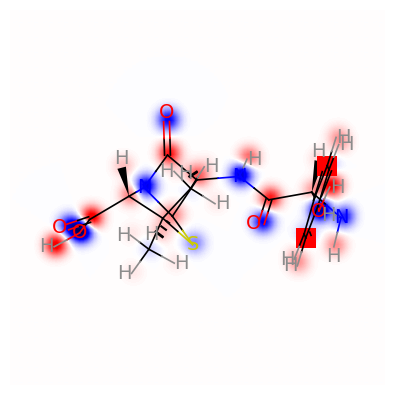

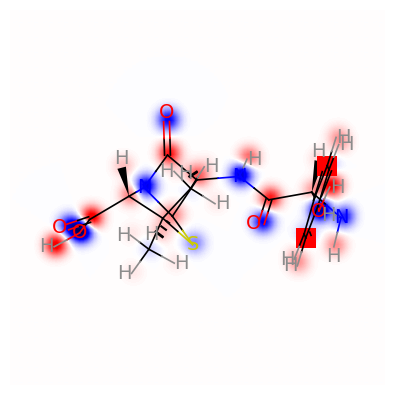

In [22]:
# Compute Gasteiger partial charges
AllChem.ComputeGasteigerCharges(amoxicillin)

# Generate a list with the charge weights (Gasteiger charges) for each atom
charge_weights = [amoxicillin.GetAtomWithIdx(i).GetDoubleProp('_GasteigerCharge') for i in range(amoxicillin.GetNumAtoms())]

# Generate a similarity map
similarity_map = SimilarityMaps.GetSimilarityMapFromWeights(amoxicillin, charge_weights, contourLines=0, colorMap='seismic', size=(150, 150))

## 3D Molecular Descriptors

3D molecular descriptors are numerical values that represent the spatial properties of a molecule. These include characteristics such as:
- **Shape:** Molecular volume, surface area, and flexibility.
- **Polarity:** Dipole moments and electrostatic properties.
- **Accessibility:** Surface areas available for interactions.

Before computing 3D descriptors, it is essential to generate a 3D conformation of the molecule (we previously [generate energy minimized conformations for `amoxicillin`](#working-with-3d-molecules)).

---

### `Descriptors3D.CalcMolDescriptors3D()`

This method will calculate eleven 3D properties and return the results as a dictionary.

**Parameters**:  
- **mol** : `Mol`  
  The input molecule for which to calculate 3D molecular descriptors.  
- **confId** : `int`, *(default: `-1`)*  
  The conformer ID to use for the calculation. If `-1`, the default conformer is used.  

**Returns**:  
- `dict`  
  A dictionary containing calculated 3D molecular descriptors, including spatial, shape, and electrostatic properties.

---

<br>

Let's using the `Descriptors3D.CalcMolDescriptors3D()` method to calculate serval 3D properties for `amoxicillin`:

In [20]:
amoxicillin_3D_descriptors = Descriptors3D.CalcMolDescriptors3D(mol=amoxicillin)
amoxicillin_3D_descriptors

{'PMI1': 1580.6130029938438,
 'PMI2': 3391.318093259227,
 'PMI3': 4181.273762521054,
 'NPR1': 0.37802188824891253,
 'NPR2': 0.8110729614638934,
 'RadiusOfGyration': 3.5390018118979314,
 'InertialShapeFactor': 0.0005131382317668131,
 'Eccentricity': 0.9257966580220122,
 'Asphericity': 0.25461856515233033,
 'SpherocityIndex': 0.3047840056869051,
 'PBF': 1.0008668555365028}

## Example application of 3D descriptors: Ligand Geometry

In medicinal chemistry, Normalized Principal Ratios (NPR1 and NPR2) are used to describe ligand geometries. The overall geometry and symmetry of small molecules can influence their biological activity, pharmacokinetics, and molecular interactions.

<br>

The geometry of molecules is typically presented like this:

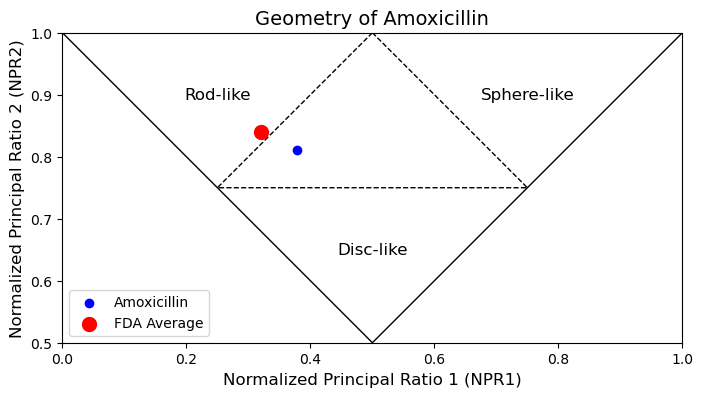

In [21]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Extracting NPR1 and NPR2 values for plotting
npr1_values = [amoxicillin_3D_descriptors["NPR1"]]
npr2_values = [amoxicillin_3D_descriptors["NPR2"]]

# FDA average values (example)
fda_average_npr1 = 0.32
fda_average_npr2 = 0.84

# Plotting
plt.figure(figsize=(8, 8))
plt.gca().set_aspect('equal')

# Outer triangle [0, 1], [0.5, 0.5], [1, 1]
outer_triangle = patches.Polygon([[0, 1], [0.5, 0.5], [1, 1]], closed=True, edgecolor='black', fill=None)
plt.gca().add_patch(outer_triangle)

# Inner triangle [0.5, 1], [0.25, 0.75], [0.75, 0.75]
inner_triangle = patches.Polygon([[0.5, 1], [0.25, 0.75], [0.75, 0.75]], closed=True, edgecolor='black', fill=None, linestyle='--')
plt.gca().add_patch(inner_triangle)

# Adding points for ligands
plt.scatter(npr1_values, npr2_values, color='blue', label='Amoxicillin', zorder=3)

# FDA average
plt.scatter(fda_average_npr1, fda_average_npr2, color='red', s=100, label='FDA Average', zorder=3)

# Region labels
plt.text(0.25, 0.9, "Rod-like", fontsize=12, ha='center', va='center', color='black')
plt.text(0.5, 0.65, "Disc-like", fontsize=12, ha='center', va='center', color='black')
plt.text(0.75, 0.9, "Sphere-like", fontsize=12, ha='center', va='center', color='black')

# Axes limits and labels
plt.xlim(0, 1)
plt.ylim(0.5, 1)
plt.xlabel("Normalized Principal Ratio 1 (NPR1)", fontsize=12)
plt.ylabel("Normalized Principal Ratio 2 (NPR2)", fontsize=12)
plt.legend()
plt.title("Geometry of Amoxicillin", fontsize=14)

# Show plot
plt.show()
